# Problema

Uma companhia áerea gostaria de realizar uma campanha de marketing para aumentar o número de passageiros que participam do programa de fidelidade da empresa

O programa de fidelidade da empresa oferece 3 tipos de benefícios, de acordo com o uso e o engajamento do passageiro com a empresa, ao longo do tempo. Estes níveis de prêmio são representados pelos tipos de cartões de fidelidade. 

O programa de fidelidade possui 3 cartões de participação: Star, Nova e Aurora. Cada cartão possui níveis benefícios e prêmios, sendo o Star com menos e o Aurora com mais prêmios. 

O time de marketing forneceu uma base de novos clientes para o time comercial entrar em contato e fazer a oferta da assinatura do programa de fidelidade. Porém, não há vendedores suficientes no time comercial para abordar todos os clientes, obrigando o time alcançarem altas taxas de compra de assinatura, para baterem a meta. 

Para alcançar a meta o time comercial precisa entrar em contato com o cliente, sabendo qual a probabilidade dele assinar o cartão Star, Novus ou Aurora. Assim, o vendedor consegue oferecer o cartão de maior probabilidade, diminuindo o tempo da venda e aumentando a receita, através da oferta do cartão mais adequado para o perfil de uso de cada cliente.

--------------------------------------------

Você foi contratado como Cientista de Dados para determinar qual a probabilidade de cada cliente assinar cada um dos três cartões do programa de fidelidade. 

Exemplo: o cliente A tem probabilidade de 70% de assinar o cartão Star, 20% de assinar o cartão Nova e 10% de assinar o cartão Aurora. Com esta informação em mãos, o vendedor pode oferecer para o cliente A, o cartão Star diretamente. 


Este é um problema comum de definição de perfil do cliente. Deveremos escolher um modelo estatístico, um bom modelo estatístico, para fazer a definição do perfil do cliente. Ao longo deste projeto, testaremos alguns dos modelos que sejam capazes de classificar melhor o cliente entre as 3 classes: Probabilidade de assinar Star, Nova ou Aurora. O modelo será um modelo de classificação multi-rótulo (não é binário!). É um problema de modelo multi-rótulo, pois envolve a previsão de multiplas classes (ou rótulos) para cada cliente, isto é, cada cliente pode ser associado a mais de um tipo de cartão (3 cartões). 

A principal diferença entre um problema binário e um problema de multi-rótulo é que em um problema binário, cada instância de dados está associado a uma única classe (sim ou não) enquanto um problema de multilabel cada instância de dados podem ser associadas a múltiplas classes simultâneamente (como no exercício dos cartões).

------------------------------------------

# Descrição do banco de dados

**Dados dos Voos dos Membros do Programa de Fidelidade em flight_activity:**

- **Loyalty Number:** Número único de fidelidade do cliente
- **Year:** Ano do período
- **Month:** Mês do período
- **Flights Booked:** Número de voos reservados apenas para o membro no período
- **Flights with Companions:** Número de voos reservados com passageiros adicionais no período
- **Total Flights:** Soma dos Voos Reservados e Voos com Acompanhantes
- **Distance:** Distância de voo percorrida no período (km)
- **Points Accumulated:** Pontos de fidelidade acumulados no período
- **Points Redeemed:** Pontos de fidelidade resgatados no período
- **Dollar Cost Points Redeemed:** Valor em dólar dos pontos resgatados no período em CDN

**Dados dos Membros do Programa de Fidelidade em flight_loyalty_history:**

- **Loyalty Number:** Número único de fidelidade do cliente
- **Country:** País de residência
- **Province:** Província de residência
- **City:** Cidade de residência
- **Postal Code:** Código postal de residência
- **Gender:** Gênero
- **Education:** Nível educacional mais alto (Ensino médio ou inferior > Faculdade > Bacharelado > Mestrado > Doutorado)
- **Salary:** Renda anual
- **Marital Status:** Estado civil (Solteiro, Casado, Divorciado)
- **Loyalty Card:** Status do cartão de fidelidade (Estrela > Nova > Aurora)
- **CLV (Customer Lifetime Value):** Valor vitalício do cliente - valor total da fatura de todos os voos já reservados pelo membro
- **Enrollment Type:** Tipo de inscrição (Padrão / Promoção de 2018)
- **Enrollment Year:** Ano em que o membro se inscreveu no programa de associação
- **Enrollment Month:** Mês em que o membro se inscreveu no programa de associação
- **Cancellation Year:** Ano em que o membro cancelou sua associação
- **Cancellation Month:** Mês em que o membro cancelou sua associação


# Importando as bibliotecas necessárias para dar inicio a nossa análise. 



Bibliotecas são pacotes do python que possuem um conjunto de módulos, códigos pré-escritos, que nos permitem realizar diversas tarefas sem a necessidade de escrever o código do zero e que acaba por facilitar o desenvolvimento de novos projetos. 

In [57]:
import sqlite3 as sq3 # Importando a biblioteca SQLite3 para trabalhar com dados que está inserido em um banco de dados.
import pandas as pd # Importando a biblioteca Pandas como principal ferramenta para análise de dados.
import seaborn as sns # Importando a biblioteca Seaborn para visualização dos dados
import numpy as np
from scipy.stats import ttest_ind # Importando o teste de hipótese T de Student do scipy para realizar testes estatísticos.
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt 
%matplotlib inline

# Utilizando a linguagem SQLite para acessar o banco de dados.

Nesta seção, iremos utilizar a biblioteca SQLite3 que possui nela a linguagem SQLite para visualizar o banco de dados que temos para trabalhar. É a linguagem SQLite dentro de um ambiente python ainda utilizando funções do python como o .head() 



In [58]:
conn = sq3.connect('C:\\Users\\Roberto\\notebookspython\\Airline\\database.db') # Armazenando a base de dados na variável 
                                                                                # conn

In [59]:
# Consulta de dados no banco de dados 
# utilizando a linguagem SQL e a linguagem Python 

# Criando um cursor 
cursor = conn.cursor()

# Executando uma consulta no SQLite para verificar as tabelas 
cursor.execute('''
               SELECT 
                   name 
                FROM 
                    sqlite_master 
                WHERE 
                    type = 'table'; 
               ''')

# Recuperando as tabelas 
tabelas = cursor.fetchall()

# Fazendo um laço no python para exibir as tabelas
for tabela in tabelas:
    print(tabela[0])

flight_activity
flight_loyalty_history


In [60]:
# Realizando uma Consulta SQL com o * (coringa) para visualizar todos os dados da tabela flight_activity

# Escrevendo a consulta 
Consultas = '''
    SELECT *
    FROM flight_activity

'''

# Lendo a consulta 
df_atividade_fa = pd.read_sql_query(Consultas, conn)
df_atividade_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [61]:
# Realizando uma Consulta SQL com o * (coringa) para visualizar todos os dados da tabela flight_loyalty_history

# Escrevendo a consulta SQL 
Consultas = '''
    SELECT *
    FROM flight_loyalty_history

'''
# Lendo a consulta 
df_atividade_flh = pd.read_sql_query(Consultas, conn)
df_atividade_flh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loyalty_number      16737 non-null  int64  
 1   country             16737 non-null  object 
 2   province            16737 non-null  object 
 3   city                16737 non-null  object 
 4   postal_code         16737 non-null  object 
 5   gender              16737 non-null  object 
 6   education           16737 non-null  object 
 7   salary              12499 non-null  float64
 8   marital_status      16737 non-null  object 
 9   loyalty_card        16737 non-null  object 
 10  clv                 16737 non-null  float64
 11  enrollment_type     16737 non-null  object 
 12  enrollment_year     16737 non-null  int64  
 13  enrollment_month    16737 non-null  int64  
 14  cancellation_year   2067 non-null   float64
 15  cancellation_month  2067 non-null   float64
dtypes: f

Podemos ver que a nossa variavel-alvo é a variável "loyalty card" que está inserida dentro da base de dados "flight_loyalty_history" 


Vamos juntar nossas bases de dados em apenas uma base de dados 

In [62]:
df_atividade_fa.nunique()

loyalty_number                 16737
year                               2
month                             12
flights_booked                    22
flights_with_companions           12
total_flights                     33
distance                        4746
points_accumulated              1549
points_redeemed                  587
dollar_cost_points_redeemed       49
dtype: int64

In [63]:
df_atividade_flh.nunique()

loyalty_number        16737
country                   1
province                 11
city                     29
postal_code              55
gender                    2
education                 5
salary                 5890
marital_status            3
loyalty_card              3
clv                    7984
enrollment_type           2
enrollment_year           7
enrollment_month         12
cancellation_year         6
cancellation_month       12
dtype: int64

In [64]:
df_atividade_fa = df_atividade_fa.groupby('loyalty_number', as_index=False).sum()
df_atividade = pd.merge(df_atividade_flh, df_atividade_fa, on='loyalty_number', how='inner')
df_atividade.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,...,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,NaN,48420,156,132,39,171,51877,5224.44,1418,115
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,...,NaN,48420,156,190,25,215,41578,4176.04,1971,159
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,...,1.0,48420,156,66,21,87,19664,1963.00,374,30
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,...,NaN,48420,156,123,36,159,36043,3626.68,1291,105
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,...,NaN,48420,156,132,44,176,36840,3689.68,0,0


# Analisando e tratando os dados. 

In [65]:
# Verificando todas as informações dentro do meu dataframe. Nesta etapa, vamos verificar: 
# Quantidade de colunas, nome das colunas, quantidade de dados e dados não-nulos e também os tipos. 
df_atividade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 0 to 16736
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               16737 non-null  int64  
 1   country                      16737 non-null  object 
 2   province                     16737 non-null  object 
 3   city                         16737 non-null  object 
 4   postal_code                  16737 non-null  object 
 5   gender                       16737 non-null  object 
 6   education                    16737 non-null  object 
 7   salary                       12499 non-null  float64
 8   marital_status               16737 non-null  object 
 9   loyalty_card                 16737 non-null  object 
 10  clv                          16737 non-null  float64
 11  enrollment_type              16737 non-null  object 
 12  enrollment_year              16737 non-null  int64  
 13  enrollment_month

In [66]:
# Verificando a quantidade de valores nulos através de uma função que retorna booleanos e usando o sum para
# Somar todos os Trues (nulos)
df_atividade.isnull().sum()

loyalty_number                     0
country                            0
province                           0
city                               0
postal_code                        0
gender                             0
education                          0
salary                          4238
marital_status                     0
loyalty_card                       0
clv                                0
enrollment_type                    0
enrollment_year                    0
enrollment_month                   0
cancellation_year              14670
cancellation_month             14670
year                               0
month                              0
flights_booked                     0
flights_with_companions            0
total_flights                      0
distance                           0
points_accumulated                 0
points_redeemed                    0
dollar_cost_points_redeemed        0
dtype: int64

In [67]:
# 'loyalty_number', 'year','total_flights', 'loyalty_number', country, 'province', 'city', 'postal_code', 'education', 'marital_status', 'enrollment_type', 'enrollment_year', 'enrollment_month'

Podemos ver que temos 5 colunas do tipo float64 (ponto flutuante), 12 colunas do tipo int64 (inteiro) e 9 colunas do tipo Object (Objeto). Temos 26 colunas no total e um consumo de memória de aproximadamente 80mb. 

Também podemos observar que existem colunas com bastante valores nulos. A coluna Salary possui apenas 302952 valores não-nulos e a coluna Cancellation_year e Cancellation_month possuem apenas 50064 colunas não-nulas. Observando préviamente, iremos dar um drop nesta duas últimas colunas, pois a grande maioria dos dados estão nulos. 

Em relação a coluna Salary, são 102 mil linhas de valores nulos. Como temos 400.000 dados no nosso DataFrame e estamos supondo que os valores são representativos, vamos apenas dropar as linhas nulas. 

In [68]:
df_atividade.drop(columns = ['cancellation_year', 'cancellation_month'], inplace = True)

In [69]:
df_atividade.dropna(inplace = True)

In [70]:
df_atividade.duplicated().sum()

0

In [71]:
df_atividade.corr()

C:\Users\Roberto\AppData\Local\Temp\ipykernel_2672\1964327396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_atividade.corr()


,loyalty_number,salary,clv,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
loyalty_number,1.000000,0.014260,-0.008790,0.003497,0.006392,0.010498,0.010498,0.000394,-0.003078,-0.000398,0.001455,0.001379,-0.000012,-0.000011
salary,0.014260,1.000000,-0.021947,-0.039231,0.035022,0.006704,0.006704,0.014715,0.008995,0.013852,0.018867,0.018450,0.012729,0.012703
clv,-0.008790,-0.021947,1.000000,0.002507,0.001731,0.015324,0.015324,-0.006701,-0.007058,-0.006995,-0.011342,-0.004781,0.003910,0.004035
enrollment_year,0.003497,-0.039231,0.002507,1.000000,-0.107479,-0.005937,-0.005937,-0.357731,-0.311742,-0.358337,-0.365132,-0.363252,-0.205265,-0.205418
enrollment_month,0.006392,0.035022,0.001731,-0.107479,1.000000,-0.000217,-0.000217,-0.075061,-0.058622,-0.073614,-0.077932,-0.076912,-0.035081,-0.035135
year,0.010498,0.006704,0.015324,-0.005937,-0.000217,1.000000,1.000000,0.089824,0.084365,0.091387,0.096855,0.100805,0.060430,0.060430
month,0.010498,0.006704,0.015324,-0.005937,-0.000217,1.000000,1.000000,0.089824,0.084365,0.091387,0.096855,0.100805,0.060430,0.060430
flights_booked,0.000394,0.014715,-0.006701,-0.357731,-0.075061,0.089824,0.089824,1.000000,0.827439,0.991495,0.952302,0.950945,0.515640,0.515806
flights_with_companions,-0.003078,0.008995,-0.007058,-0.311742,-0.058622,0.084365,0.084365,0.827439,1.000000,0.893485,0.835309,0.833431,0.568411,0.568549
total_flights,-0.000398,0.013852,-0.006995,-0.358337,-0.073614,0.091387,0.091387,0.991495,0.893485,1.000000,0.955174,0.953653,0.544106,0.544270


In [72]:
# Verificando as estatísticas descritivas dos valores númericos presentes na minha base de dados. 
df_atividade.describe()

,loyalty_number,salary,clv,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
count,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000,12499.000000
mean,549944.576366,79245.609409,8122.599106,2015.247700,6.668693,48900.364829,157.547644,99.429234,24.905752,124.334987,29248.073366,2993.669874,739.108249,59.820386
std,260172.670132,35008.297285,6953.122442,1.984923,3.385711,4837.926900,15.586877,54.362951,15.753850,67.976428,15831.362153,1622.949632,715.657702,57.900275
min,100018.000000,-58486.000000,2119.890000,2012.000000,1.000000,48420.000000,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325434.500000,59246.500000,4082.435000,2014.000000,4.000000,48420.000000,156.000000,59.000000,13.000000,74.000000,17535.000000,1791.640000,0.000000,0.000000
50%,551248.000000,73455.000000,5809.260000,2015.000000,7.000000,48420.000000,156.000000,113.000000,26.000000,142.000000,33800.000000,3455.500000,572.000000,46.000000
75%,773824.500000,88517.500000,9075.770000,2017.000000,10.000000,48420.000000,156.000000,139.000000,36.000000,174.000000,40830.500000,4189.000000,1176.000000,95.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,145260.000000,468.000000,354.000000,103.000000,448.000000,101959.000000,10587.500000,4479.000000,363.000000


Vamos analisar esta tabela descritiva e o que ela traz consigo.

Podemos ver que a primeira grande variável, flights_booked, que traz o número de voos reservados apenas para os membros dos períodos, tem uma média de 4.11, isto significa que, em média, os membros do programa de fidelidade reservam cerca de 4 voos durante o período que está na base de dados. Podemos ver também que o seu desvio-padrão (std) é de 5.22. Um desvio padrão de 5.22 sugere que os valores tendem a variar em 5.22 unidades em torno da média que é de 4.11. Quanto maior o desvio-padrão, maior é a dispersão dos valores em relação a média. Portanto, teóricamente, os valores de "Flights_booked" podem variar de (4.11 - 5.22) até (4.11 + 5.22)

Ainda sobre o flights_booked, vemos também o min, 25%, 50%, 75% e o max. O min mostra o valor mínimo, que é 0. O max mostra o valor máximo, que é 21. Em relação aos 25% (primeiro quartil), vemos que 25% dos valores da coluna "flights_booked" são iguais a 0. Em relação aos 50% (mediana ou segundo quartil), vemos que 50% dos valores são iguais a 1 ou menores do que 1. Em relação aos 75%, vemos que 75% dos valores são iguais ou menores do que 8. Estes quartis fornecem informações sobre a distribuição dos dados, ou seja, o fato da mediana ser igual a 1 sugere que metade dos membros reservam 1 ou menos voos, enquanto a outra metade reserva mais de 1 voo.  

Em relação a média e ao desvio padrão, estes quartis ajudam a entender a distribuição dos dados: O fato do primeiro quartil ser 0 e a mediana ser 1 indica que uma quantidade significante de pessoas reservam muito poucos ou quase nenhum voo, o que puxa a média para baixo. O fato do terceiro quartil ser 8 e o valor máximo ser 21 indicam que existem membros que reservam um número considerável de voos (afinal, até 75% dos valores são iguais ou menores do que 8), o que acaba contribuindo para uma maior dispersão dos dados, refletida no desvio padrão relativamente alto comparado com a média.

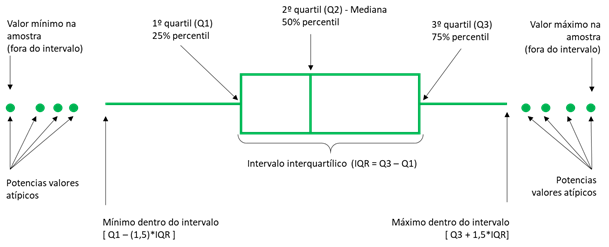

# Flights_booked

In [73]:
# Claculando o intervalo interquantil 
Q1 = df_atividade['flights_booked'].quantile(0.25) # Calculando o Quartil 1 
Q3 = df_atividade['flights_booked'].quantile(0.75) # Calculando o QUartil 2 
IQR = Q3 - Q1

# Calculando o limite superior
limite_superior = Q3 + 1.5 * IQR

# Exibindo os quartis e o limite superior.
print(f'O primeiro quartil é {Q1} e o terceiro quartil é {Q3}')
print(f'O limite superior do boxplot para flights_booked é {limite_superior}')

O primeiro quartil é 59.0 e o terceiro quartil é 139.0
O limite superior do boxplot para flights_booked é 259.0


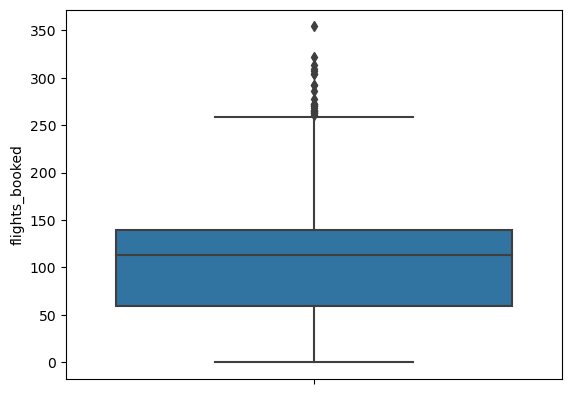

In [74]:
sns.boxplot(y = 'flights_booked', data = df_atividade);

Plotamos um boxplot para verificar as informações do "flights_booked". Podemos ver que a mediana realmente está no 1 (a linha que corta o boxplot), que o terceiro quartil engloba até o valor 8 e que o valor máximo de 21 é um outlier, dado o boxplot. 

In [75]:
# Plotando a quantidade de voos para cada cliente. Exemplo: 18228 clientes voaram 3 vezes. 
df_atividade['flights_booked'].value_counts(ascending = False)

0      1151
120     144
125     138
128     136
126     135
       ... 
354       1
224       1
309       1
234       1
220       1
Name: flights_booked, Length: 254, dtype: int64

# Flights_with_companions

In [76]:
# Verificando a contagem de valores para flights_with_companions. De 0 até 11. 
df_atividade['flights_with_companions'].value_counts()

0     1397
27     348
35     326
30     322
28     319
      ... 
76       1
66       1
87       1
91       1
82       1
Name: flights_with_companions, Length: 90, dtype: int64

<Axes: ylabel='flights_with_companions'>

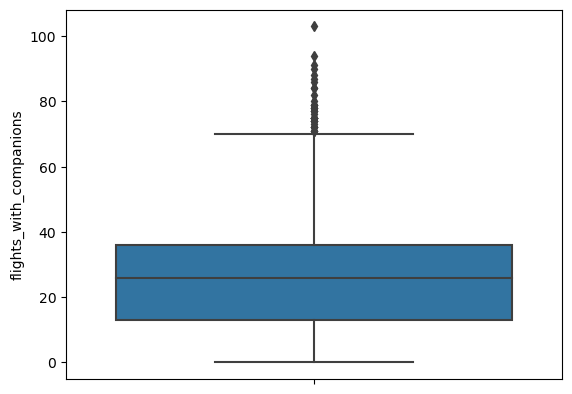

In [77]:
# Plotando um boxplot para a variável "flights_with_companions"
sns.boxplot(y = df_atividade['flights_with_companions'])

<Axes: xlabel='flights_with_companions', ylabel='count'>

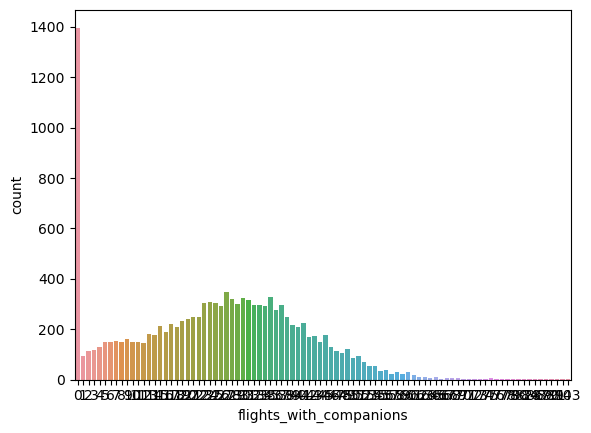

In [78]:
sns.countplot(x = df_atividade['flights_with_companions'])

A variável flights_with_companions é uma variável que apresenta bastante outliers. No entanto, verificando a correlação dela, ela tem uma correlação relativamente forte e positiva com outras variáveis, como a flights_booked. Sua correlação varia entre 0.3 até 0.7, portanto, ela pode ser importante para o nosso modelo. Verificaremos sua importância quando rodarmos nosso modelo e aí decidiremos se iremos removê-la ou não. Análise de variância, análise SHAP, Feature Importance. São muitas das técnicas que utilizamos para escolhermos as variáveis que de fato irão agregar no nosso modelo.  

# Total_flights

<Axes: ylabel='total_flights'>

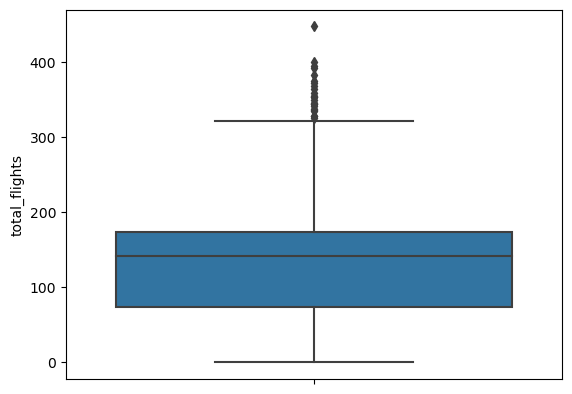

In [79]:
# Plotando um boxplot para a variável total_flights. 
sns.boxplot(y = df_atividade['total_flights'])

In [80]:
# Verificando a quantidade de valores para total_flights
df_atividade['total_flights'].value_counts()

0      1151
145     120
148     117
154     113
160     110
       ... 
448       1
265       1
306       1
344       1
338       1
Name: total_flights, Length: 314, dtype: int64

Notamos que muitas pessoas, praticamente metade da nossa base de dados, nunca realizaram um único voo. 
A pedido da equipe de marketing, devemos manter estas pessoas na análise, pois ainda sim eles são clientes importantes para a análise.

Vamos verificar que tipo de plano fidelidade tem os clientes que pegaram 31 e 32 voos. 

In [81]:
# Fazendo uma busca em que os voos totais são iguais a 31 OU 32
df_atividade.query("(total_flights == 31 or total_flights == 32)")

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,...,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
924,217616,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,95606.0,Married,Aurora,...,7,48420,156,27,5,32,8005,800.00,0,0
1184,392989,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,62237.0,Married,Aurora,...,9,48420,156,27,4,31,7480,747.00,0,0
1320,450802,Canada,Ontario,Toronto,M2M 6J7,Male,Bachelor,86388.0,Single,Aurora,...,8,48420,156,19,13,32,7689,767.00,0,0
3243,290250,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,15609.0,Divorced,Nova,...,3,48420,156,29,2,31,7993,823.00,0,0
3432,377928,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,84971.0,Married,Aurora,...,9,48420,156,27,5,32,3048,304.00,0,0
3497,901461,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,63211.0,Single,Aurora,...,7,48420,156,26,6,32,6987,697.00,760,61
3691,914074,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,74234.0,Married,Aurora,...,8,48420,156,19,13,32,5655,564.00,0,0
4191,890232,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,53045.0,Single,Nova,...,5,48420,156,24,7,31,9255,923.00,0,0
4782,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,...,4,48420,156,21,10,31,10124,1011.00,0,0
5267,690984,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,92259.0,Married,Nova,...,7,48420,156,24,8,32,9196,919.00,542,44


Notamos que há 60 linhas. Quantos são do plano Star, Nova e Aurora?

In [82]:
df_atividade.query('(total_flights == 31 or total_flights == 32)')['loyalty_card'].value_counts()

Star      21
Nova      20
Aurora     6
Name: loyalty_card, dtype: int64

Portanto, das pessoas que pegaram 31 e 32 voos, 30 são do cartão Star, 17 do cartão Nova e 13 do cartão Aurora.

# Distance

In [83]:
# Verificando a soma das distâncias percorrida. 
df_atividade['distance'].sum()

365571669

<Axes: xlabel='distance', ylabel='Count'>

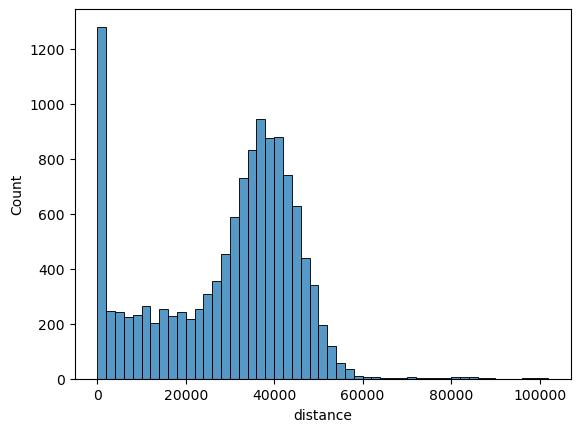

In [84]:
# Fazendo um histograma para verificar a distribuição da variável distância
sns.histplot(x = 'distance', data = df_atividade)

Podemos notar através do histograma que a variável "distance" possui uma grande assimetria a direita, muito devido a distância 0. Praticamente metade. Chegamos na conclusão antes, mas vemos aqui novamente, que muitas pessoas na nossa base de dados tem distância percorrida igual a 0, o que quer dizer que nunca pegaram um voo.

<Axes: xlabel='distance', ylabel='Count'>

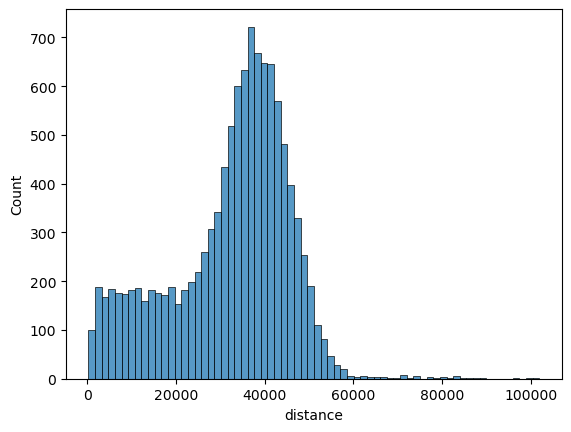

In [85]:
# Fazendo um filtro para eliminar a distância 0 para vermos a distribuição sem a distância 0 
df_distance_filtrado = df_atividade[df_atividade['distance'] != 0]

# Plotando um novo histograma com a variável filtrada.
sns.histplot(x = df_distance_filtrado['distance'])

Plotamos um histograma para verificar a distribuição dos dados sem a quantidade de voos sendo 0.

# Points_accumulated

<Axes: xlabel='points_accumulated', ylabel='Count'>

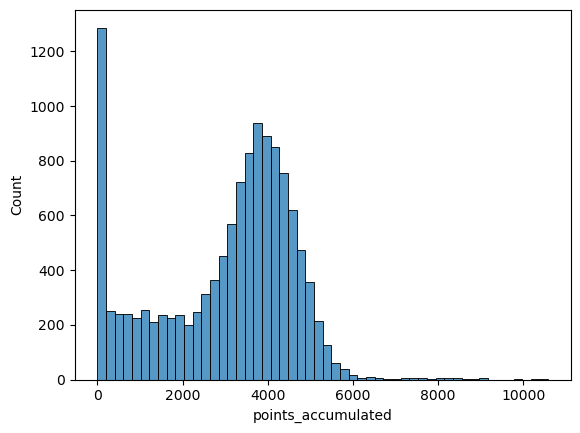

In [86]:
sns.histplot(x = df_atividade['points_accumulated'])

<Axes: xlabel='points_accumulated', ylabel='Count'>

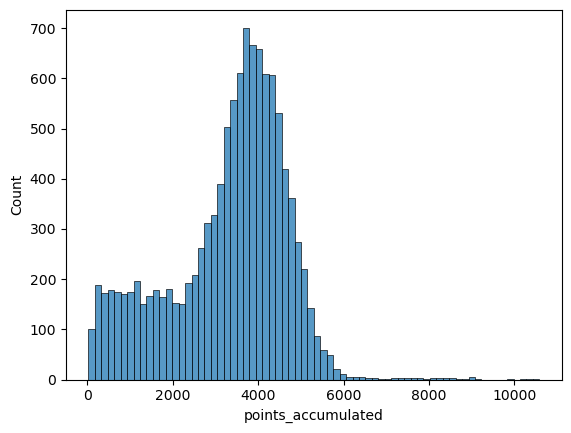

In [87]:
# Fazendo um filtro para eliminar a distância 0 para vermos a distribuição sem a distância 0 
df_distance_filtrado = df_atividade[df_atividade['points_accumulated'] != 0]

# Plotando um novo histograma com a variável filtrada.
sns.histplot(x = df_distance_filtrado['points_accumulated'])

<Axes: ylabel='points_accumulated'>

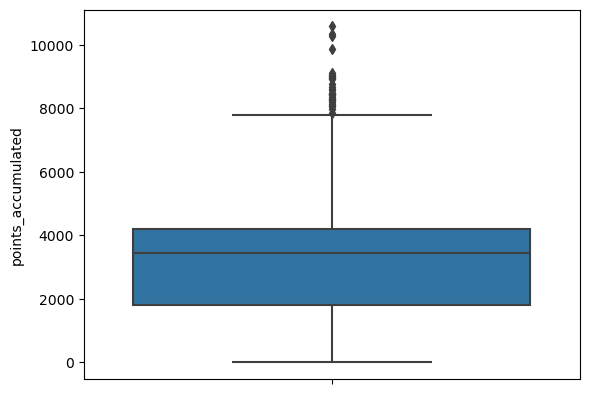

In [88]:
sns.boxplot(y = df_atividade['points_accumulated'])

<Axes: xlabel='points_accumulated', ylabel='distance'>

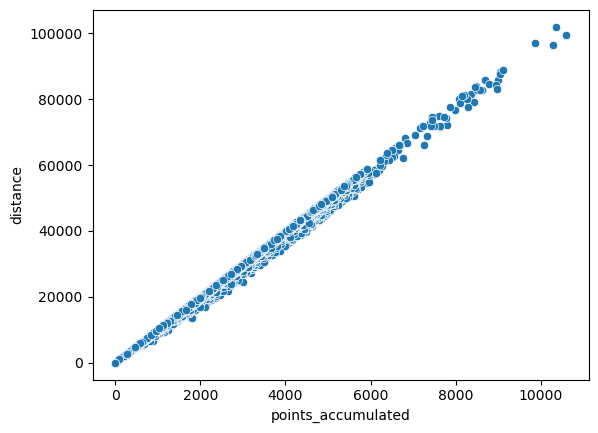

In [89]:
sns.scatterplot(y = 'distance', x = 'points_accumulated', data = df_atividade)

A variável "points_accumulated" tem correlação muita alta com a distância. Vamos remover então a variável "points_accumulated".

# points_redeemed

<Axes: xlabel='points_redeemed', ylabel='Count'>

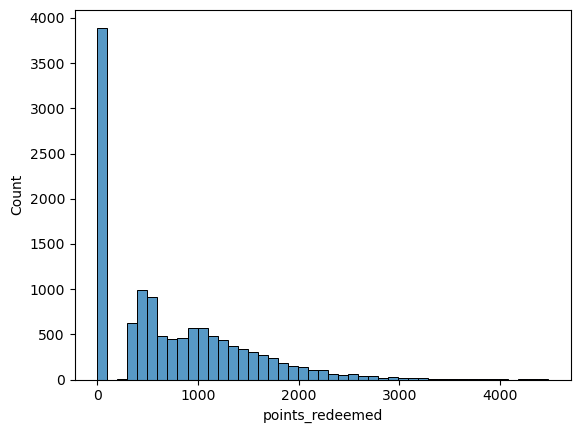

In [90]:
sns.histplot(x = 'points_redeemed', data = df_atividade)

<Axes: xlabel='points_redeemed'>

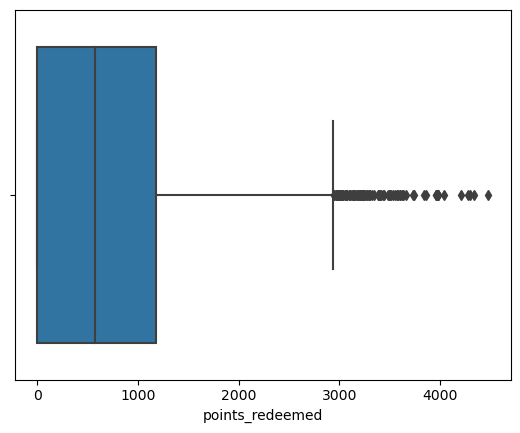

In [91]:
sns.boxplot(x = 'points_redeemed', data = df_atividade)

Vamos dropar esta variável points_redemeed.

# dollar_cost_points_redeemed

<Axes: xlabel='dollar_cost_points_redeemed', ylabel='Count'>

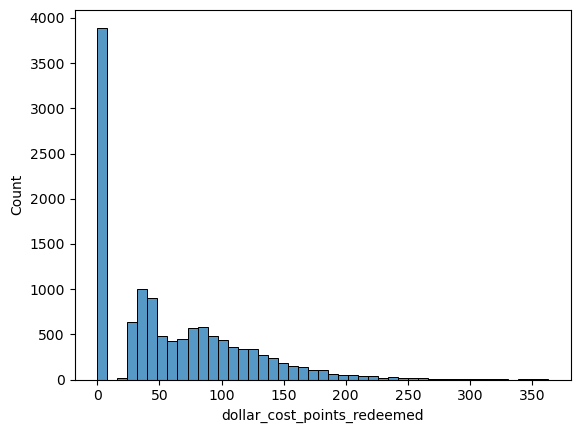

In [92]:
sns.histplot(x = 'dollar_cost_points_redeemed', data = df_atividade)

<Axes: xlabel='dollar_cost_points_redeemed'>

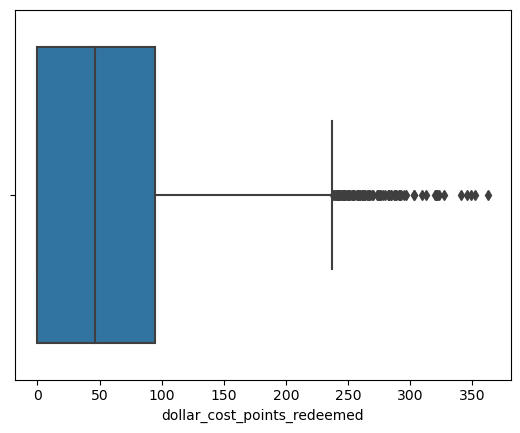

In [93]:
sns.boxplot(x = 'dollar_cost_points_redeemed', data = df_atividade)

Vamos dropar esta coluna "dollar_cost_points_redeemed"

# Salary

<Axes: xlabel='salary', ylabel='Count'>

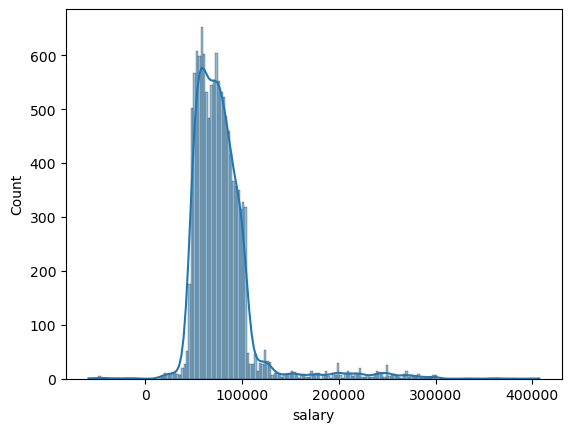

In [94]:
sns.histplot(x = 'salary', kde = True, data = df_atividade)

# CLV

<Axes: xlabel='clv', ylabel='Count'>

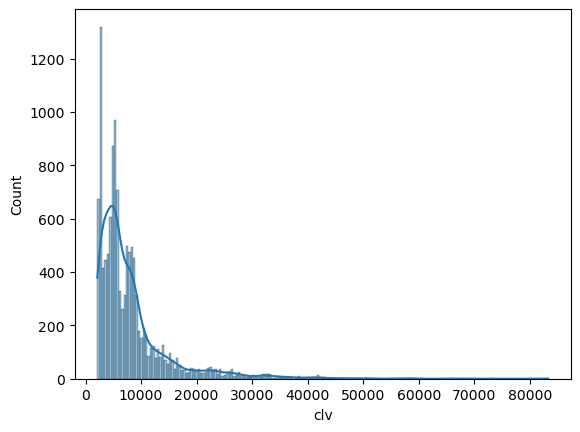

In [95]:
sns.histplot(x = 'clv', kde = True, data = df_atividade)

# Outras variáveis numéricas

Variáveis como 


- **Enrollment Type:** Tipo de inscrição (Padrão / Promoção de 2018)
- **Enrollment Year:** Ano em que o membro se inscreveu no programa de associação
- **Enrollment Month:** Mês em que o membro se inscreveu no programa de associação

Apenas dizem o tipo de inscrição, o ano de inscrição e o mês de inscrição. 


A partir de agora, veremos nossas variáveis categóricas, incluindo a loyalty_card que é a nossa variável que a gente quer prever. 

# loyalty_card (y)

<Axes: xlabel='loyalty_card', ylabel='count'>

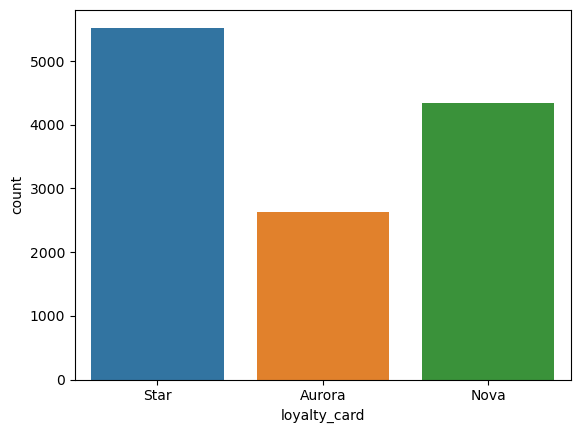

In [96]:
sns.countplot(x = 'loyalty_card', data = df_atividade)

# Country, Province & City

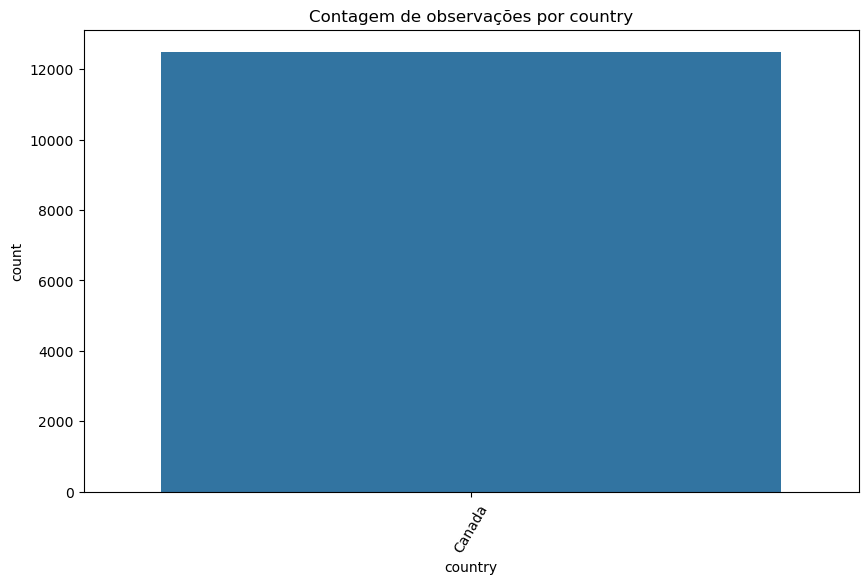

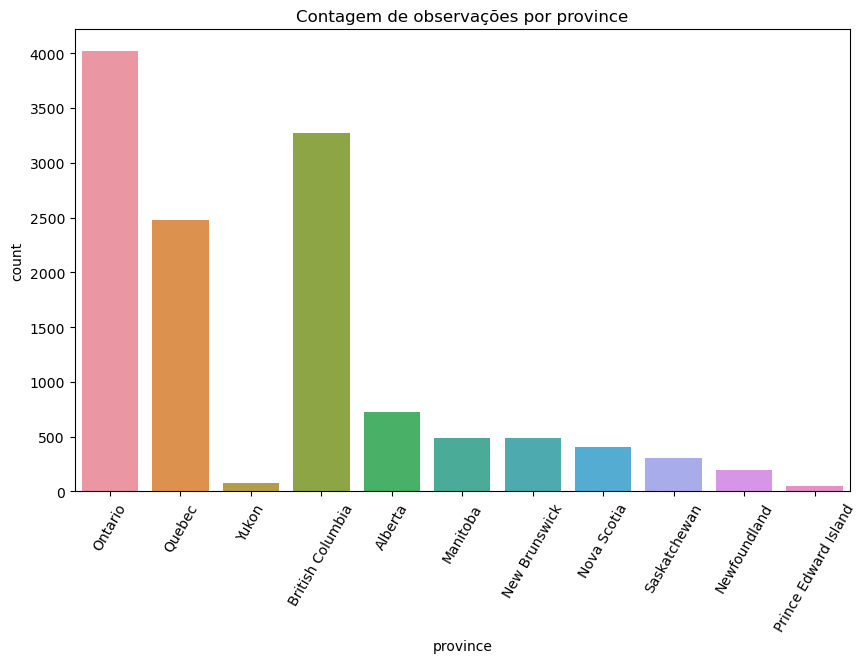

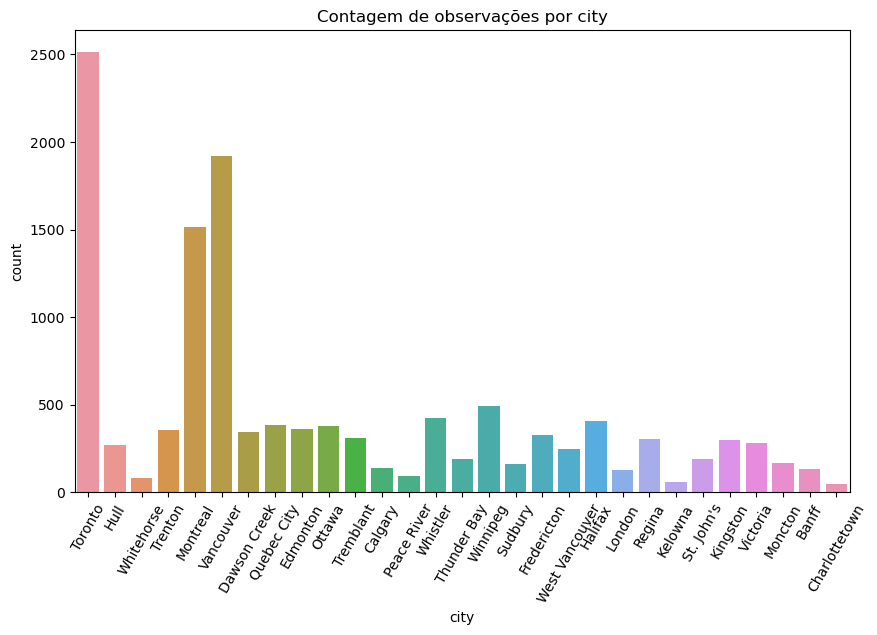

In [97]:
colunas = ['country', 'province', 'city']

for lugar in colunas:
    plt.figure(figsize = (10, 6))
    sns.countplot(x = lugar, data = df_atividade)
    plt.title(f'Contagem de observações por {lugar}')
    plt.xlabel(lugar)
    plt.xticks(rotation = 60)
    plt.show()

# Gender 

In [98]:
df_atividade['gender'].value_counts()

Female    6326
Male      6173
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

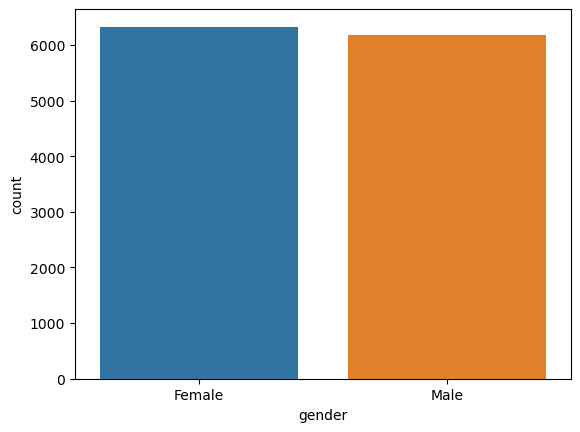

In [99]:
sns.countplot(x = 'gender', data = df_atividade)

# Marital Status

In [129]:
df_atividade['marital_status'].value_counts()

Married     8299
Divorced    2142
Single      2058
Name: marital_status, dtype: int64

<Axes: xlabel='marital_status', ylabel='flights_with_companions'>

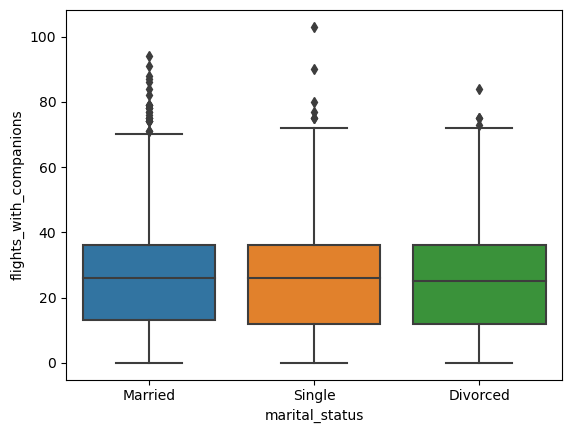

In [130]:
sns.boxplot(x = 'marital_status', y = 'flights_with_companions', data = df_atividade)

Vamos realizar um teste estatistico para ver se há uma quantidade significativa de voos com acompanhantes para as pessoas casadas vs solteiras.

In [102]:
#voos_casados = df_atividade[df_atividade['marital_status'] == 'Married']['flights_with_companions']
#voos_solteiros = df_atividade[df_atividade['marital_status'] == 'Single']['flights_with_companions']

#estatistica_t, p_valor = ttest_ind(voos_casados, voos_solteiros)

#print(f'O valor da estatistica t é {estatistica_t}')
#print(f'O p-valor é {p_valor}')
#print('')
#if p_valor < 0.05:
#    print('Como o p_valor é menor do que 0.05, rejeitamos a hipótese nula, portanto, há uma diferença significativa entre os grupos de pessoas solteiras e casadas em relação a quantidade de voos com acompanhante')
#else:
#    print('Como o p_valor é maior do que 0.05, aceitamos a hipótese nula, portanto, não há diferença significativa entre os grupos de pessoas solteiras e casadas em relação a quantidade de voos com acompanhante')

# Escolhendo as variáveis préviamente. 

In [131]:
df_limpo = df_atividade.drop(columns = ['loyalty_number', 'year', 'gender',
                                        'country', 'province', 'city', 
                                        'postal_code', 'education', 'month',
                                        'enrollment_type', 'enrollment_year', 'enrollment_month'])

In [132]:
df_limpo

,salary,marital_status,loyalty_card,clv,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,83236.0,Married,Star,3839.14,132,39,171,51877,5224.44,1418,115
4,103495.0,Married,Star,3842.79,132,44,176,36840,3689.68,0,0
5,51124.0,Married,Star,3844.57,292,54,346,83996,8464.16,1222,99
7,100159.0,Married,Star,3861.49,144,41,185,41278,4177.92,733,59
8,100159.0,Married,Star,3861.49,91,33,124,34878,3529.04,1516,123
...,...,...,...,...,...,...,...,...,...,...,...
16729,88425.0,Married,Star,56675.94,133,18,151,27070,2733.52,2359,191
16730,76778.0,Single,Star,58166.55,0,0,0,0,0.00,0,0
16733,89210.0,Married,Star,67907.27,198,45,243,43420,4348.76,1645,132
16735,-57297.0,Married,Star,10018.66,128,26,154,41381,4166.44,0,0


# Por que?

Estatísticas descritivas são úteis para escolhermos o nosso melhor modelo, entender a distribuição dos dados e identificar potenciais outliers. Visualização da distribuição das variáveis também.

Em muitos casos, remover outliers pode melhorar o desempenho do modelo, no entanto, é necessário analisar cuidadosamente os outliers para verificar se estas informações são importantes para o nosso modelo. Entender a distribuição dos dados e verificar outliers também ajuda escolhermos o nosso melhor modelo. Modelos como Decision Tree Classifier e Random Forest Classifier lidam melhor com outliers, assimetria e escalas do que modelos lineares, como uma regressão logística. 

# Avançando no Machine Learning

In [136]:
df_limpo.head()

,salary,marital_status,loyalty_card,clv,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,83236.0,1,Star,3839.14,132,39,171,51877,5224.44,1418,115
4,103495.0,1,Star,3842.79,132,44,176,36840,3689.68,0,0
5,51124.0,1,Star,3844.57,292,54,346,83996,8464.16,1222,99
7,100159.0,1,Star,3861.49,144,41,185,41278,4177.92,733,59
8,100159.0,1,Star,3861.49,91,33,124,34878,3529.04,1516,123


In [137]:
df_limpo['marital_status'].unique()

array([1, 0, 2], dtype=int64)

In [135]:
mapa = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
df_limpo['marital_status'] = df_limpo['marital_status'].map(mapa)

A nossa escolha de modelo inicial será uma Floresta Aleatória.

A escolha da Floresta Aleatória se baseia em várias razões, são algumas delas: as árvores de decisões podem lidar com dados assimétricos; as árvores de decisões são robustas para outliers; as árvores de decisões são eficientes computacionalmente falando quando tratamos com grandes conjuntos de dados; as árvores de decisões podem capturar relações não lineares e; as árvores de decisões são fáceis de interpretar. 

In [138]:
X = df_limpo.drop(columns = 'loyalty_card')
y = df_limpo['loyalty_card'].copy()

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.33, random_state = 42)

escalonador = StandardScaler()
X_treino_escalonado = escalonador.fit_transform(X_treino)

dtc = RandomForestClassifier(random_state = 42) # Testando com as configurações normais, otimização de hiperparâmetros 
dtc = dtc.fit(X_treino_escalonado, y_treino)    # Em breve. 

cross_val_score(dtc, X_treino_escalonado, y_treino, cv = 5, scoring = 'accuracy').mean()

0.5620958290982364

In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_teste_escalonado = escalonador.transform(X_teste)

y_pred_dtc = dtc.predict(X_teste_escalonado)
acuracia = f1_score(y_teste, y_pred_dtc, average = 'weighted')
acuracia

0.5914929644334924

import gradio as gr

#def predict(flights_booked, flights_with_companions, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed, salary, clv): 
 #   X_novo = np.array([[flights_booked, flights_with_companions, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed, salary, clv]])
  #  previsao = dtc.predict_proba(X_novo)
    return {"Aurora" : previsao[0][0], "Nova" : previsao[0][1], "Star" : previsao[0][2]}


with gr.Blocks() as demo:
# Título do painel 
   # gr.Markdown( """ # Propensão de Compra """)
    
   # with gr.Row():
      #  with gr.Column():
            gr.Markdown(""" # Coluna 1 """)
            flights_booked   = gr.Slider(label = 'flights_booked', minimum = 0, maximum = 21, step = 1, randomize = True)
            flights_with_companions = gr.Slider(label = 'flights_with_companions', minimum = 0, maximum = 11, step = 1, randomize = True)
            distance = gr.Slider(label = 'distance', minimum = 0, maximum = 6293, step = 10, randomize = True)
            points_accumulated = gr.Slider(label = 'points_accumulated', minimum = 0, maximum = 676.5, step = 5, randomize = True)            points_redeemed = gr.Slider(label = 'points_redeemed', minimum = 0, maximum = 876, step = 5, randomize = True)
            dollar_cost_points_redeemed = gr.Slider(label = 'dollar_cost_points_redeemed', minimum = 0, maximum = 71, step = 3, randomize = True)
            salary = gr.Slider(label = 'salary', minimum = 0, maximum = 407228.0, step = 100, randomize = True)
            clv = gr.Slider(label = 'clv', minimum = 2119.89, maximum = 83325.38, step = 50, randomize = True)
            
            with gr.Row():
                with gr.Row():
                    gr.Markdown( """ # Botão de previsão """ )
                    predict_btn = gr.Button(value = 'Previsão')
                    
    with gr.Column():
        gr.Markdown(""" Propensão de compra do cliente """)
        label = gr.Label()
    
    # Botão predict
    
    predict_btn.click(fn = predict, 
                     inputs = [
                         flights_booked,
                         flights_with_companions,
                         distance,
                         points_accumulated,
                         points_redeemed,
                         dollar_cost_points_redeemed,
                         salary,
                         clv 
                     ],
                     outputs=[label])      

demo.launch(debug = True, share = False)

import gradio as gr

def predict(flights_booked, flights_with_companions, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed, salary, clv): 
    X_novo = np.array([[flights_booked, flights_with_companions, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed, salary, clv]])
    previsao = dtc.predict_proba(X_novo)
    return {"Aurora" : previsao[0][0], "Nova" : previsao[0][1], "Star" : previsao[0][2]}


with gr.Blocks() as demo:
# Título do painel 
    gr.Markdown( """ # Propensão de Compra """)
    
    with gr.Row():
        with gr.Column():
            gr.Markdown(""" # Coluna 1 """)
            flights_booked   = gr.Slider(label = 'flights_booked', minimum = 0, maximum = 21, step = 1, randomize = True)
            flights_with_companions = gr.Slider(label = 'flights_with_companions', minimum = 0, maximum = 11, step = 1, randomize = True)
            distance = gr.Slider(label = 'distance', minimum = 0, maximum = 6293, step = 10, randomize = True)
            points_accumulated = gr.Slider(label = 'points_accumulated', minimum = 0, maximum = 676.5, step = 5, randomize = True)
            points_redeemed = gr.Slider(label = 'points_redeemed', minimum = 0, maximum = 876, step = 5, randomize = True)
            dollar_cost_points_redeemed = gr.Slider(label = 'dollar_cost_points_redeemed', minimum = 0, maximum = 71, step = 3, randomize = True)
            salary = gr.Slider(label = 'salary', minimum = 0, maximum = 407228.0, step = 100, randomize = True)
            clv = gr.Slider(label = 'clv', minimum = 2119.89, maximum = 83325.38, step = 50, randomize = True)
            
            with gr.Row():
                with gr.Row():
                    gr.Markdown( """ # Botão de previsão """ )
                    predict_btn = gr.Button(value = 'Previsão')
                    
    with gr.Column():
        gr.Markdown(""" Propensão de compra do cliente """)
        label = gr.Label()
    
    # Botão predict
    
    predict_btn.click(fn = predict, 
                     inputs = [
                         flights_booked,
                         flights_with_companions,
                         distance,
                         points_accumulated,
                         points_redeemed,
                         dollar_cost_points_redeemed,
                         salary,
                         clv 
                     ],
                     outputs=[label])      

demo.launch(debug = True, share = False)

In [142]:
import gradio as gr 

def predict(*args): 
    X_novo = np.array([args]).reshape(1, -1)
    X_novo_escalonado = escalonador.transform(X_novo)
    previsao = dtc.predict_proba(X_novo_escalonado)
    return {"Aurora" : previsao[0][0], "Nova" : previsao[0][1], "Star" : previsao[0][2]}

with gr.Blocks() as demo:
# Título do painel 
    gr.Markdown( """ # Propensão de Compra """)
    
    with gr.Row():
        with gr.Column():
            gr.Markdown(""" # Coluna 1 """)
            flights_booked   = gr.Slider(label = 'flights_booked', minimum = 0, maximum = 21, step = 1, randomize = True)
            flights_with_companions = gr.Slider(label = 'flights_with_companions', minimum = 0, maximum = 11, step = 1, randomize = True)
            distance = gr.Slider(label = 'distance', minimum = 0, maximum = 6293, step = 10, randomize = True)
            points_accumulated = gr.Slider(label = 'points_accumulated', minimum = 0, maximum = 676.5, step = 5, randomize = True)
            points_redeemed = gr.Slider(label = 'points_redeemed', minimum = 0, maximum = 876, step = 5, randomize = True)
            dollar_cost_points_redeemed = gr.Slider(label = 'dollar_cost_points_redeemed', minimum = 0, maximum = 71, step = 3, randomize = True)
            salary = gr.Slider(label = 'salary', minimum = 0, maximum = 407228.0, step = 100, randomize = True)
            clv = gr.Slider(label = 'clv', minimum = 2119.89, maximum = 83325.38, step = 50, randomize = True)
            
            with gr.Row():
                with gr.Row():
                    gr.Markdown( """ # Botão de previsão """ )
                    predict_btn = gr.Button(value = 'Previsão')
                    
    with gr.Column():
        gr.Markdown(""" Propensão de compra do cliente """)
        label = gr.Label()
    
    # Botão predict
    
    predict_btn.click(fn = predict, 
                     inputs = [
                         flights_booked,
                         flights_with_companions,
                         distance,
                         points_accumulated,
                         points_redeemed,
                         dollar_cost_points_redeemed,
                         salary,
                         clv 
                     ],
                     outputs=[label])      

demo.launch(debug = True, share = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\Roberto\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\Roberto\anaconda3\lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
  File "C:\Users\Roberto\anaconda3\lib\site-packages\gradio\route_utils.py", line 230, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\Roberto\anaconda3\lib\site-packages\gradio\blocks.py", line 1590, in process_api
    result = await self.call_function(
  File "C:\Users\Roberto\anaconda3\lib\site-packages\gradio\blocks.py", line 1176, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\Roberto\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable

Keyboard interruption in main thread... closing server.


# Continuação em breve. Melhora do modelo em breve.